In [1]:
from functools import partial

def multiply(a, b):
    return a * b

double = partial(multiply, 2)
triple = partial(multiply, 3)

#Через partial мы можем делать новую функцию на основе старой, заранее определяя в ней аргументы
#Например тут мы сделали функции, которые умножают на 2 и на 3 соответственно

In [ ]:
from functools import partial

def pretty_print(text, symbol, count):
    print(symbol * count)
    print(text)
    print(symbol * count)

star_pretty_print = partial(pretty_print, 'Hi!!!', symbol='*')

# star_pretty_print(count=7)

print(star_pretty_print.args)       #('Hi!!!',)
print(star_pretty_print.keywords)   #{'symbol': '*'}
print(star_pretty_print.func)       #<function pretty_print at 0x000001CD55DF1760>

# star_pretty_print.func('Исходная функция', symbol='~', count=20)

#Можно получить название исходной функции и её аргументы

('Hi!!!',)
{'symbol': '*'}
<function pretty_print at 0x000001CD55DF1760>


In [ ]:
from functools import partial, update_wrapper

def multiply(a, b):
    '''Функция перемножает два числа и возвращает вычисленное значение.'''
    return a * b

double = partial(multiply, 2)

update_wrapper(double, multiply)   # копируем информацию из функции multiply в partial объект double

print(double.__name__)
print(double.__doc__)


#Добавляем нашей partial функции name и doc

In [10]:
from functools import partial

beegeek = partial(print, sep=', ')

beegeek('beegeek', 'stepik', 'python', sep='-')

beegeek-stepik-python


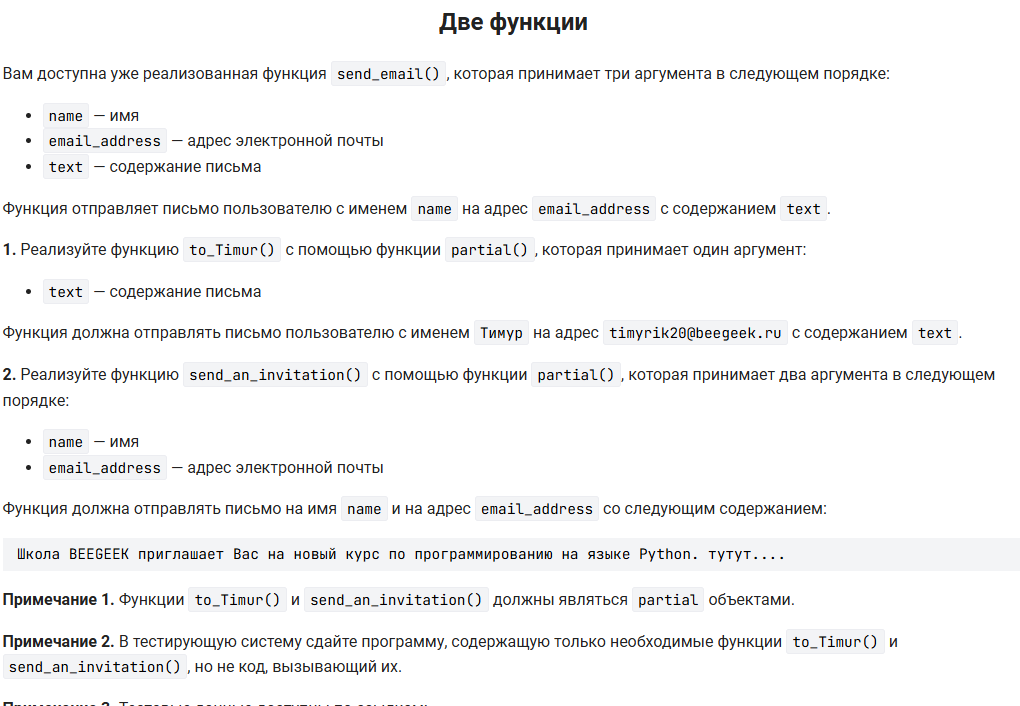

In [17]:


def send_email(name,email_address,text):
    print(f'Получатель:{name},email:{email_address},текст сообщения:{text}')

from functools import partial
send_an_invitation = partial(send_email,text='Школа BEEGEEK приглашает Вас на новый курс по программированию на языке Python. тутут....')
to_Timur = partial(send_email,'Тимур','timyrik20@beegeek.ru')

print(send_an_invitation("Тимур", "timyrik20@beegeek.ru"))
    

Получатель:Тимур,email:timyrik20@beegeek.ru,текст сообщения:Школа BEEGEEK приглашает Вас на новый курс по программированию на языке Python. тутут....
None


In [ ]:
def fib(n):
    cache = {1: 1, 2: 1}
    def fib_rec(n):
        result = cache.get(n)
        if result is None:
            result = fib_rec(n - 2) + fib_rec(n - 1)
            cache[n] = result
        return result
    return fib_rec(n)

#Помнишь мы использовали кеширование, чтобы при вычислении фибонначи не пересчитывать уже посчитанные значения
#Иногда нам нужно хранить результат работы функции, чтобы оптимизировать её работу

====Основные стратегии====

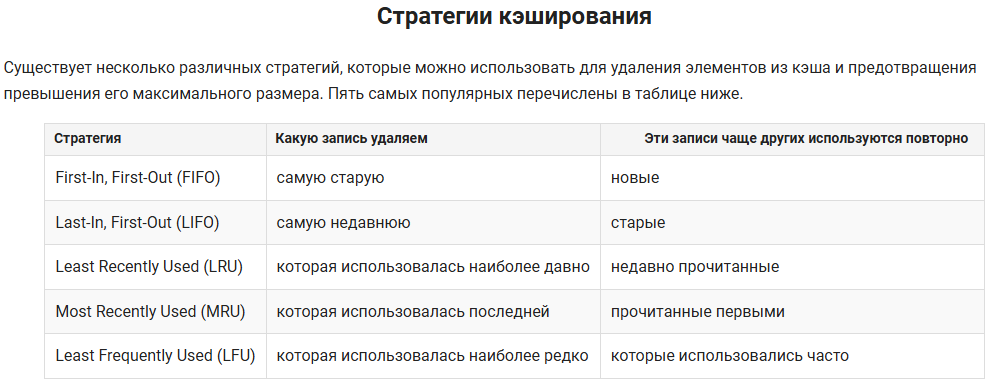

In [ ]:
from functools import lru_cache

@lru_cache()
def fibonacci(n):
    if n <= 2:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)
    
#Декоратор реализует стратегию Least Recently Used, сохраняя значения недавние и удаляя старые

In [ ]:
from functools import lru_cache

@lru_cache(typed=False)
def concat(text, num):
    return text + ' ' + str(num)

print(concat('beegeek', 1))
print(concat('beegeek', 1.0))
print(concat('beegeek', True))
print(concat('beegeek', 4.0))
print(concat('beegeek', 5))

print(concat.cache_info())

# hits – количество значений, которые lru_cache вернул непосредственно из памяти, поскольку они присутствовали в кэше
# misses – количество значений, которые были вычислены, а не взяты из памяти
# maxsize – это размер кэша, который мы определили, передав его декоратору
# currsize – текущий размер кэша

beegeek 1
beegeek 1
beegeek 1
beegeek 4.0
beegeek 5
CacheInfo(hits=2, misses=3, maxsize=128, currsize=3)


In [21]:
concat.cache_clear()

#Чистка кэша

In [22]:
from functools import lru_cache

@lru_cache()
def add_one(number):
    print(number + 1, end=' ')
    
numbers = [1, 2, 3, 1, 3, 4, 4, 1]

for i in numbers:
    add_one(i)

2 3 4 5 

In [23]:
from functools import lru_cache

@lru_cache(typed=False)
def return_this(a, b):
    return a, b

print(return_this(1, 1))
print(return_this(True, True))
print(return_this(1.0, 1.0))

(1, 1)
(1, 1)
(1, 1)


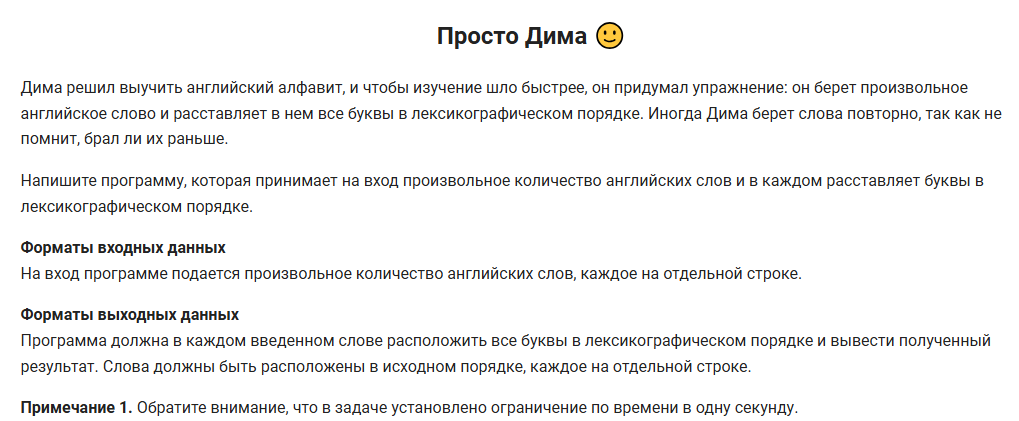

In [ ]:
import sys
from datetime import datetime
from functools import lru_cache

#Читаем все входные данные
strings = list(map(str, sys.stdin.read().splitlines()))

@lru_cache(typed=True)
def sort_letters(word):
  return sorted(word)
  
[print(''.join(sort_letters(word))) for word in strings]